In [83]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import cv2
from scipy.signal.signaltools import wiener
import skimage
from skimage import feature, io
from skimage.color import rgb2gray

# Read Input Images

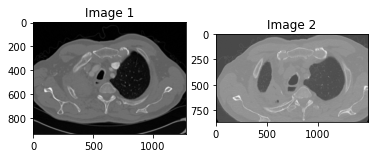

In [84]:
img1 = cv2.imread('43.jpg')
img2 = cv2.imread('53.jpg')
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

_, (plot1, plot2) = plt.subplots(1, 2)
plot1.title.set_text('Image 1')
plot2.title.set_text('Image 2')
plot1.imshow(img1, cmap='gray')
plot2.imshow(img2, cmap='gray')
plt.show()

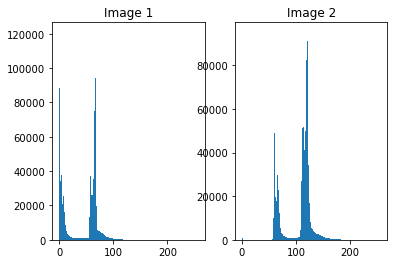

In [85]:
#hist1 = plt.hist(img1.ravel(),256,[0,256])
#plt.title('Histogram of Image 1')
#hist2 = plt.hist(img2.ravel(),256,[0,256])


_, (plot1, plot2) = plt.subplots(1, 2)
plot1.title.set_text('Image 1')
plot2.title.set_text('Image 2')
plot1.hist(img1.ravel(),256,[0,256])
plot2.hist(img2.ravel(),256,[0,256])
plt.show()

In [86]:
imgfm = cv2.blur(img2, (3,3))
res = abs(img2 - imgfm)

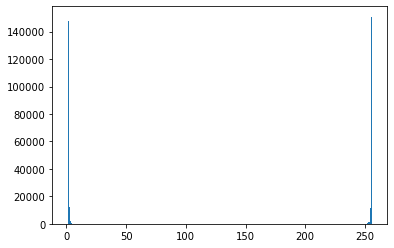

In [87]:
#t = [np.where(residual != 0)]
plt.hist(res.ravel(),255,[1,256])
plt.show()

# Adding noise manually

In [88]:
#img = img1
img = img2

# Add Noise

In [89]:
height,width = np.shape(img)

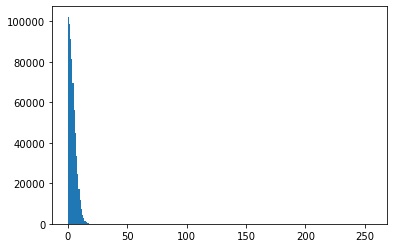

In [90]:
gauss = np.random.normal(0,5,(height,width))
g = plt.hist(gauss.ravel(),256,[0,256])
plt.show()

In [91]:
noisy = img + gauss

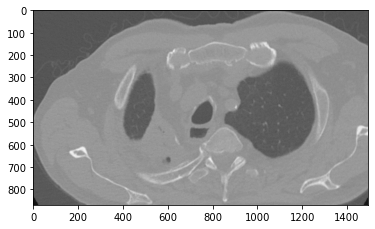

In [92]:
plt.imshow(noisy, cmap='gray')

In [93]:
def PSNR(original, processed):
    mse = np.mean((original - processed) ** 2)
    max_pixel = 255.0
    psnr = 20 * np.log10(max_pixel / np.sqrt(mse))
    print(psnr)

# Wiener filter

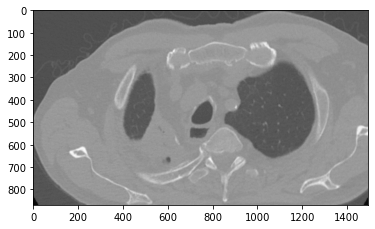

In [94]:
imgfw = wiener(noisy, (3,3))  

#img1 = img1.astype('int8')

plt.imshow(imgfw, cmap='gray')

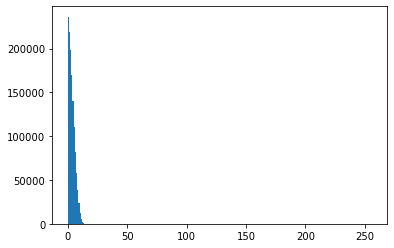

In [95]:
plt.hist(abs(noisy-imgfw).ravel(),256,[0,256])
plt.show()

In [96]:
PSNR(img,imgfw)

42.19765311693959


# Gaussian filter

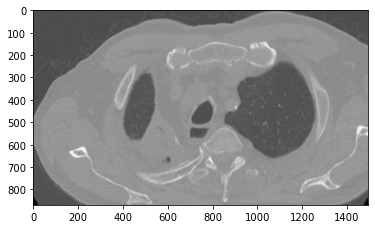

In [97]:
imgfg = cv2.GaussianBlur(noisy, (3, 3), 0)

plt.imshow(imgfg, cmap='gray')

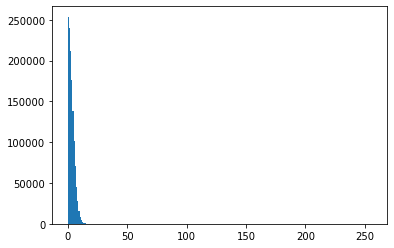

In [98]:
plt.hist(abs(noisy-imgfg).ravel(),256,[0,256])
plt.show()

In [99]:
PSNR(img,imgfg)

42.42571946328708


# Mean filter

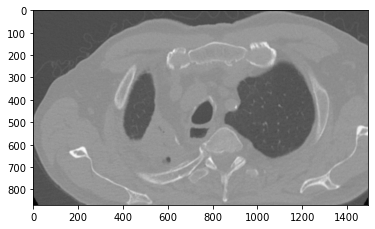

In [100]:
#noisy1  = np.float32(noisy)

imgfm = cv2.blur(noisy, (3,3))

plt.imshow(imgfm, cmap='gray')


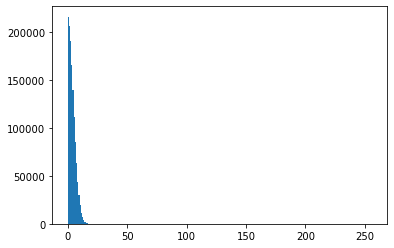

In [101]:
plt.hist(abs(noisy-imgfm).ravel(),256,[0,256])
plt.show()

In [102]:
PSNR(img,imgfm)

43.217190590787865


# Median filter

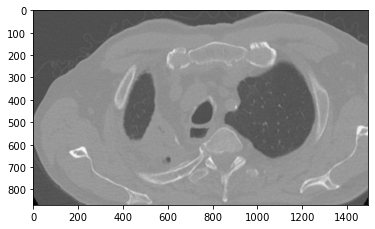

In [103]:
noisy1  = np.float32(noisy)

imgfmd = cv2.medianBlur(noisy1, 3)

plt.imshow(imgfmd, cmap='gray')

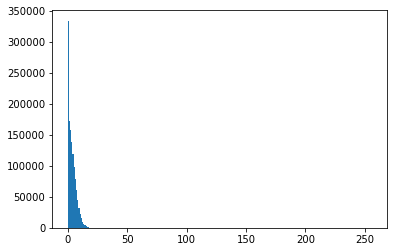

In [104]:
plt.hist(abs(noisy-imgfmd).ravel(),256,[0,256])
plt.show()

In [105]:
PSNR(img,imgfmd)

41.489647594478505


# Saving the best image

In [75]:
filename = 'img1mean.jpg'
#filename = 'img2mean.jpg'
  
#cv2.imwrite(filename, imgfm)

True